In [1]:
from pathlib import Path
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_recall_fscore_support
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import interp
import pandas as pd
import seaborn as sns

In [2]:
def roc_plot(total_actual, total_predicted, prefix=""):
    fpr, tpr, _ = roc_curve(total_actual_, total_predicted_)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize = (4,4), dpi = 300)
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC (area = %0.2f)' % roc_auc)

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize = 12)
    plt.ylabel('True Positive Rate', fontsize = 12)
    plt.title('ROC curve', fontsize = 12)
    plt.legend(loc="lower right")
    plt.savefig('{}_ROC_curve.pdf'.format(prefix))
    plt.show()


def calculate_accuracy(total_actual, total_predicted):
    acc_list = []
    for j in range(len(np_array)):
        y_true = total_actual[j]
        y_pred = total_predicted[j]
        y_true_onehot = np.zeros((len(y_true), len(class_list)))
        y_true_onehot[np.arange(len(y_true)), y_true] = 1
        y_pred_int = np.argmax(y_pred, axis=1)
        acc = accuracy_score(y_true, y_pred_int)
        acc_list.append(acc)
    return acc_list


def plot_confusion_matrix(cm, classes=None, prefix=""):
    #Normalise Confusion Matrix by dividing each value by the sum of that row
    cm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
    #Make DataFrame from Confusion Matrix and classes
    cm_df = pd.DataFrame(cm, index = classes, columns = classes)
    #Display Confusion Matrix 
    plt.figure(figsize = (4,4), dpi = 300)
    cm_plot = sns.heatmap(cm_df, vmin = 0, vmax = 1, annot = True, fmt = '.2f', cmap = 'Blues', square = True,
                          annot_kws={"size": 25})
    plt.title('Confusion Matrix', fontsize = 20)
    #Display axes labels
    plt.ylabel('True label', fontsize = 12)
    plt.xlabel('Predicted label', fontsize = 12)
    plt.savefig('{}_confusion_matrix.pdf'.format(prefix))
    plt.tight_layout()
    return cm_plot


def add_plot(np_array, shape, name, color):
    for i in range(len(np_array)):
        plt.plot(np_array[i], ls=shape, color=color)



def add_test_plot(np_array, shape, name, color, test_acc):
    for i in range(len(np_array)):
        plt.plot(np_array[i], ls=shape, color=color[i], label="val_acc: %0.2f test_acc: %0.2f" 
                 %(np_array[i][-1], test_acc[i]))

    

def learning_curve(total_train_accuracy, total_val_accuracy, acc_list):
    c = ['red', 'green','cyan','magenta','black']
    plt.figure(figsize=(15, 12))
    add_plot(total_train_accuracy, '-', 'train_accuracy', 'blue')
    add_test_plot(total_val_accuracy, '-', 'val_acc', c, acc_list)
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Epoch', fontsize=20)
    plt.legend(loc='lower right', fontsize=15)
    plt.show()


def loss_curve(total_val_loss, total_train_loss):
    plt.figure(figsize=(15, 12))
    add_plot(total_val_loss, '--', 'val_loss', 'red')
    add_plot(total_train_loss, '--', 'train_loss', 'blue')
    plt.ylabel('Loss', fontsize=20)
    plt.xlabel('Epoch', fontsize=20)
    plt.legend(loc='upper right', fontsize=20)
    plt.show()

In [3]:
BASE_PATH = Path("/scratch/imb/Xiao/HE_test/10x")

In [4]:
BASE_PATH_ANDREW = Path("/scratch/imb/Andrew")

In [5]:
VALIDATION = BASE_PATH / "results"
TEST_2171 = BASE_PATH_ANDREW / "HE_results_2171"

In [6]:
total_train_accuracy = np.load(VALIDATION / "total_train_accuracy.npy")
total_train_loss = np.load(VALIDATION / "total_train_loss.npy")
total_val_accuracy = np.load(VALIDATION / "total_val_accuracy.npy")
total_val_loss = np.load(VALIDATION / "total_val_loss.npy")
total_actual = np.load(TEST_2171 / "total_actual.npy")
total_predicted = np.load(TEST_2171 / "total_predicted.npy")
filename = np.load(TEST_2171 / "file_name.npy")

In [7]:
total_actual_ = np.ravel(total_actual)
total_actual_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [8]:
total_predicted_ = np.ravel(total_predicted)
total_predicted_

array([9.9895597e-01, 1.9539840e-04, 2.1233307e-05, ..., 9.9180776e-01,
       9.9961901e-01, 9.9995518e-01], dtype=float32)

In [9]:
classes = ["cancer", "normal"]
label_encoder = LabelEncoder()
label_encoder.fit(classes)
class_list = label_encoder.classes_
class_list

array(['cancer', 'normal'], dtype='<U6')

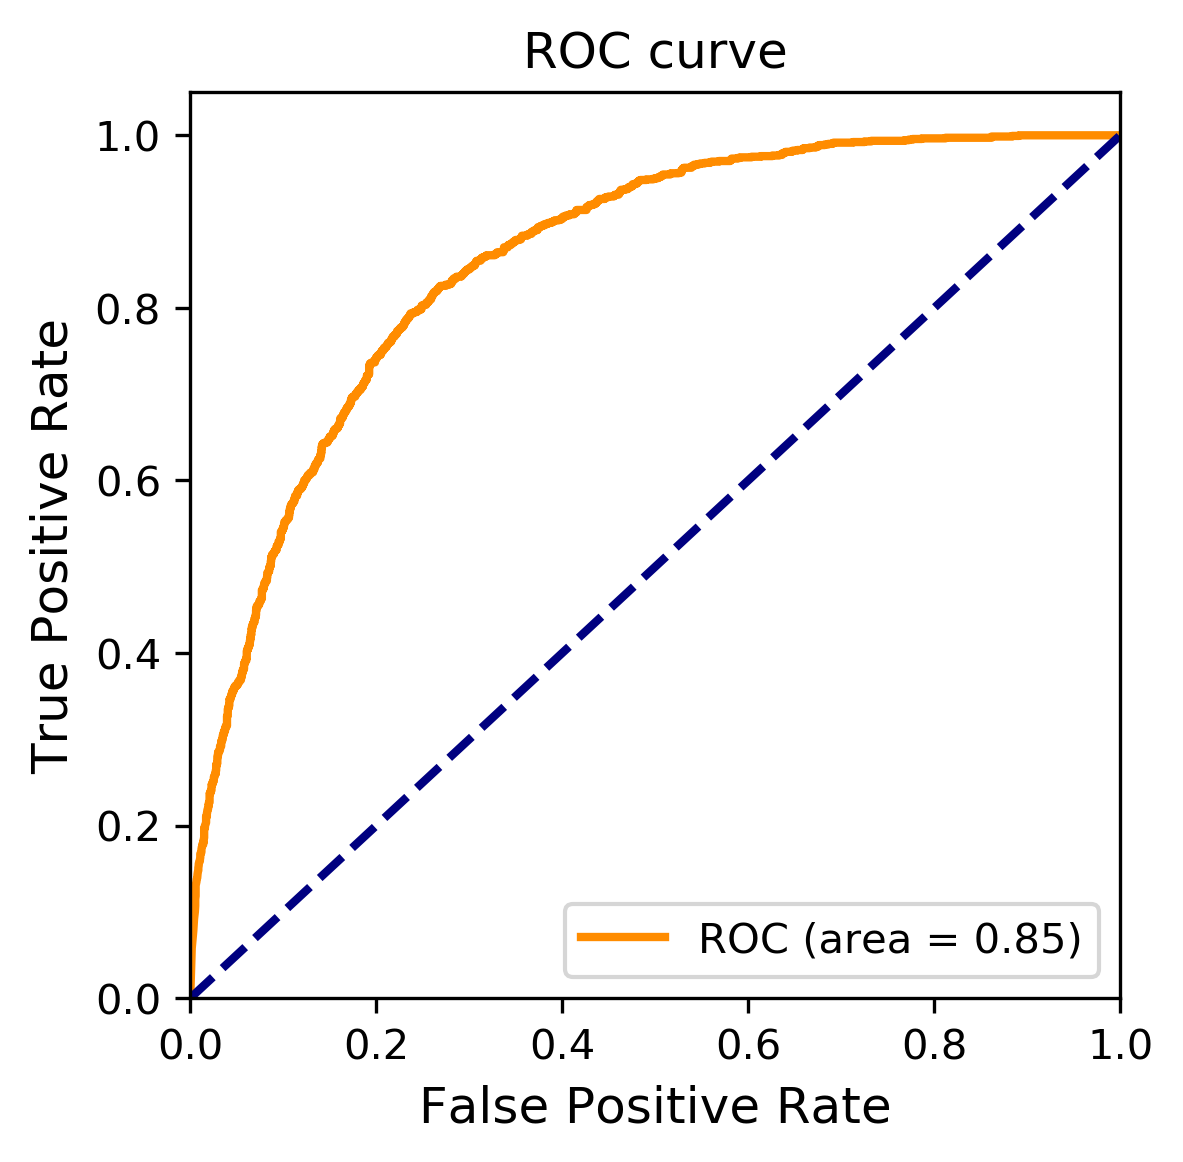

In [10]:
roc_plot(total_actual, total_predicted, prefix="HE_2171")

In [11]:
total_predicted_int = np.rint(total_predicted_)
total_predicted_int

array([1., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [12]:
cm = confusion_matrix(total_actual_, total_predicted_int)
cm

array([[2033,  368],
       [ 489,  921]])

In [13]:
cm_tile_level_labelling = np.array([[839,0],[7,833]])
cm_WSI_labelling = np.array([[698,141],[185,655]])

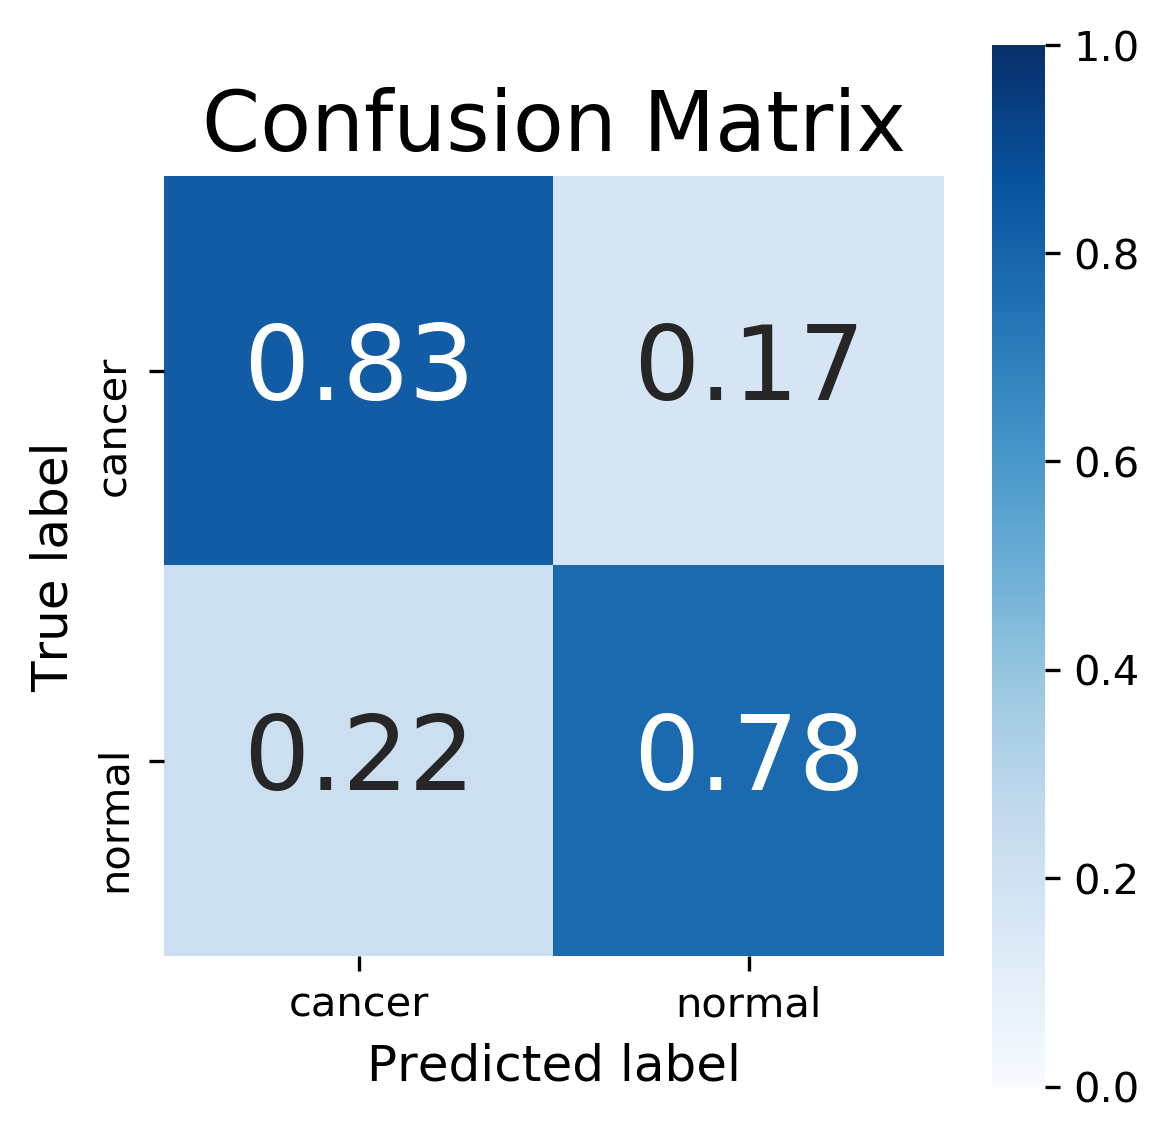

In [14]:
plot_confusion_matrix(cm_WSI_labelling, class_list, prefix="WSI_labelling")

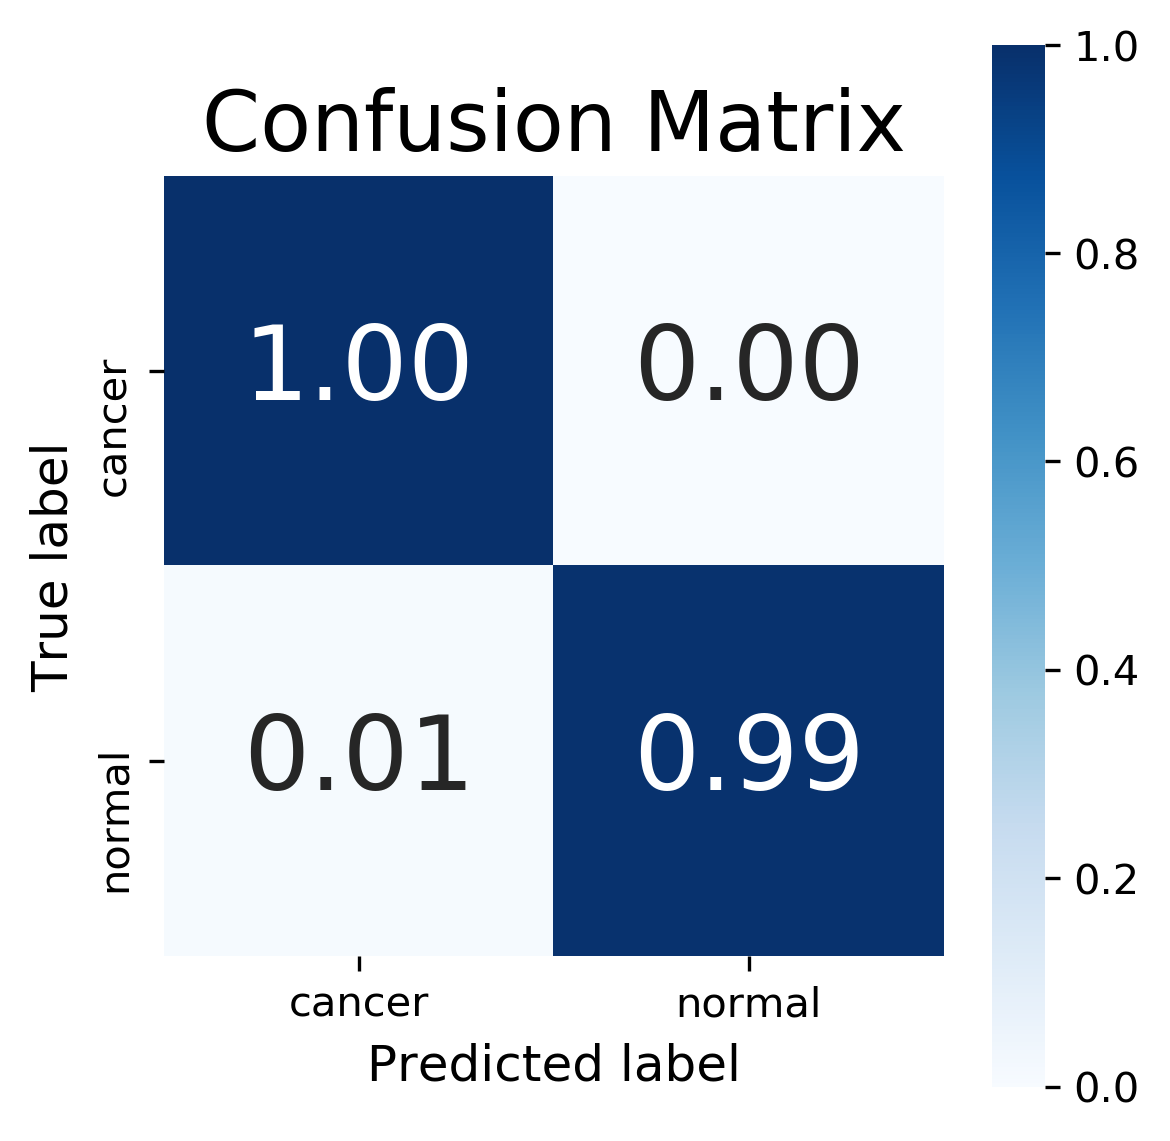

In [15]:
plot_confusion_matrix(cm_tile_level_labelling, class_list, prefix="tile_level_labelling")

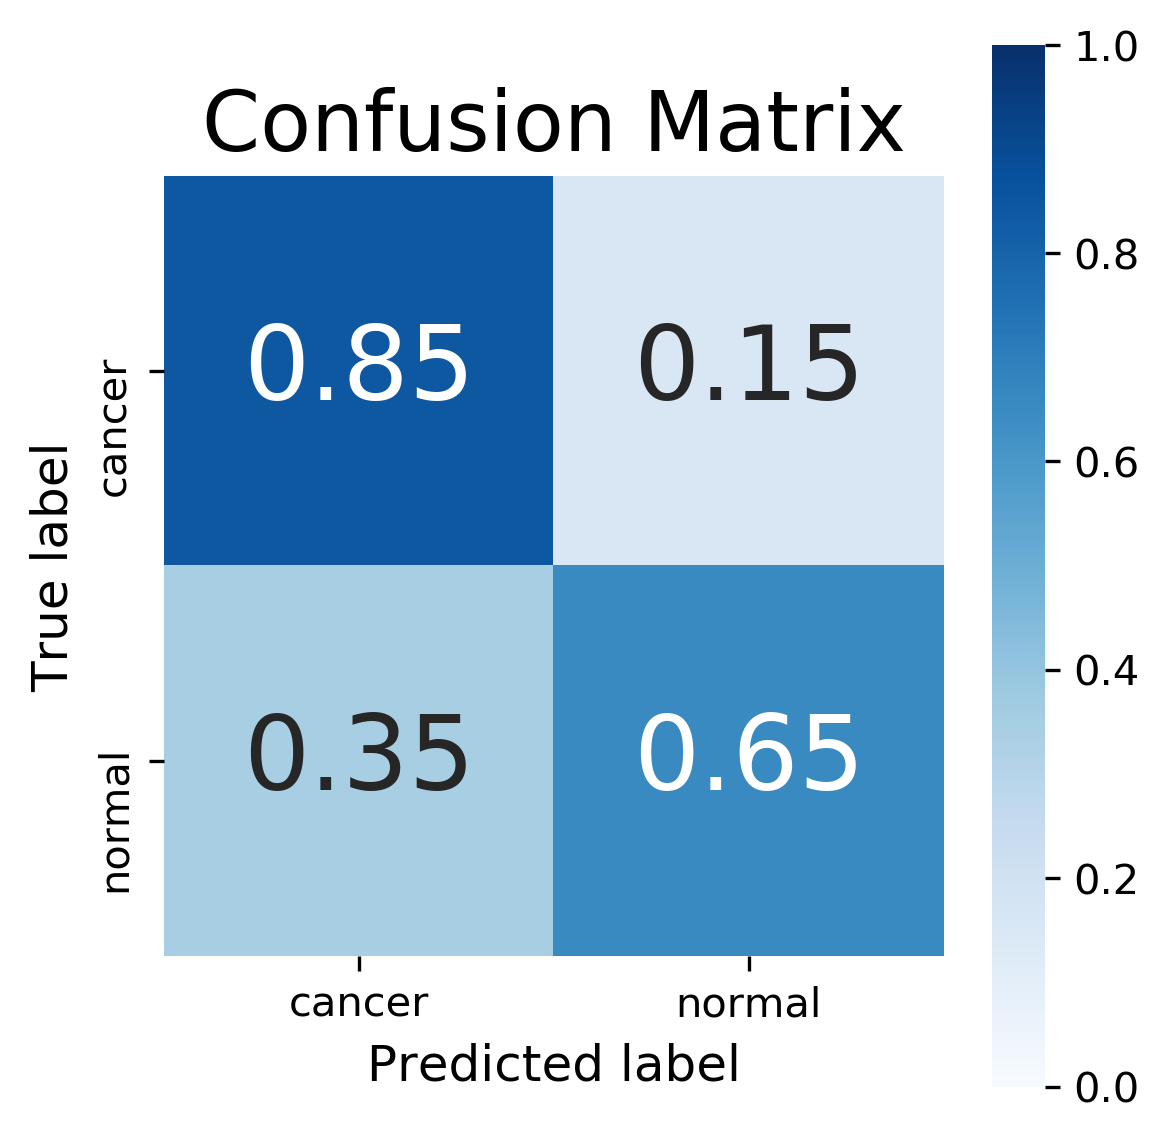

In [16]:
plot_confusion_matrix(cm, class_list, prefix="HE_2171")

In [17]:
acc = accuracy_score(total_actual_, total_predicted_int)
acc

0.7751246392023091

In [18]:
precision, recall, fscore, support = precision_recall_fscore_support(total_actual_, total_predicted_int, average='binary')
precision, recall, fscore, support

(0.7145073700543056, 0.6531914893617021, 0.6824749907373101, None)

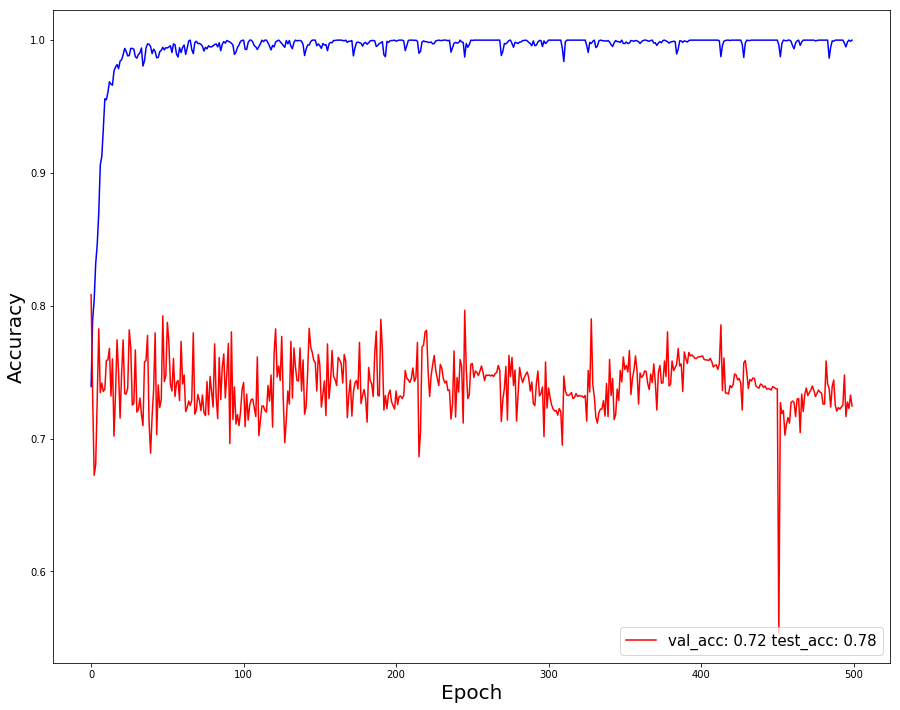

In [19]:
learning_curve(total_train_accuracy, total_val_accuracy, [0.7751246392023091])

No handles with labels found to put in legend.


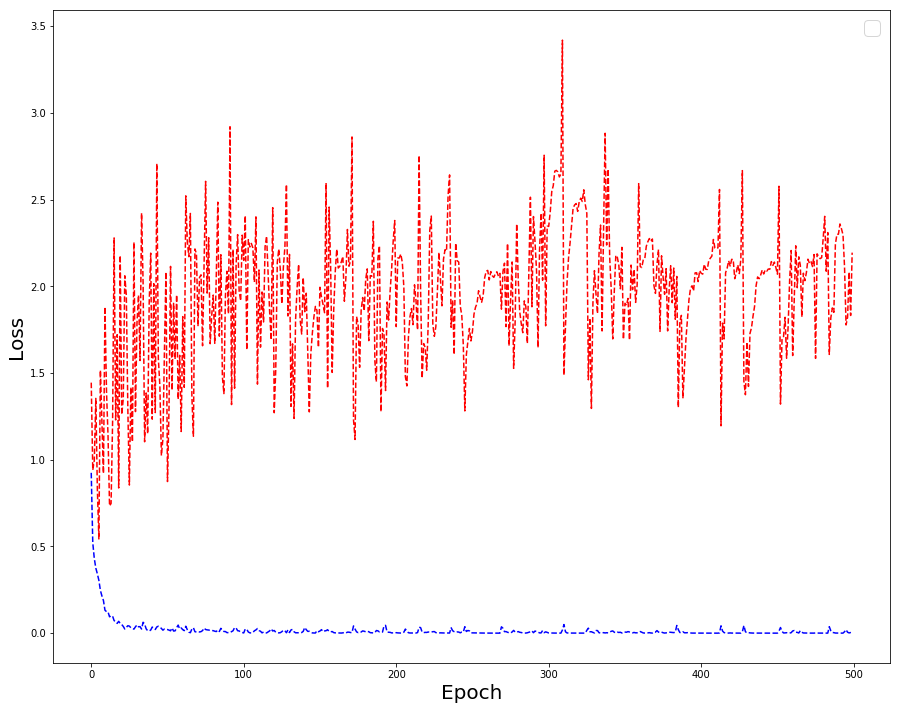

In [20]:
loss_curve(total_val_loss, total_train_loss)

In [21]:
zero_data = np.zeros(shape=(76,109))
all_neg1_data = zero_data -1
df = pd.DataFrame(all_neg1_data, columns=np.arange(109), index=np.arange(76))   # 109*76
df

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [22]:
for i, file in enumerate(filename):
    x, y = file.split(".")[0].split("_")[-2:]
    df.iloc[int(x),int(y)] = float(total_predicted_[i])

In [42]:
df = 1-df


In [43]:
df

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,-1.0,-1.0,-1.0,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,...,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000
1,-1.0,-1.0,-1.0,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,...,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000
2,-1.0,-1.0,-1.0,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,...,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000
3,-1.0,-1.0,-1.0,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,...,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000
4,-1.0,-1.0,-1.0,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,...,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000
5,-1.0,-1.0,-1.0,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,...,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000
6,-1.0,-1.0,-1.0,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,...,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000
7,-1.0,-1.0,-1.0,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,...,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000
8,-1.0,-1.0,-1.0,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,...,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000
9,-1.0,-1.0,-1.0,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,...,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000


In [44]:
mask = df <0
mask

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


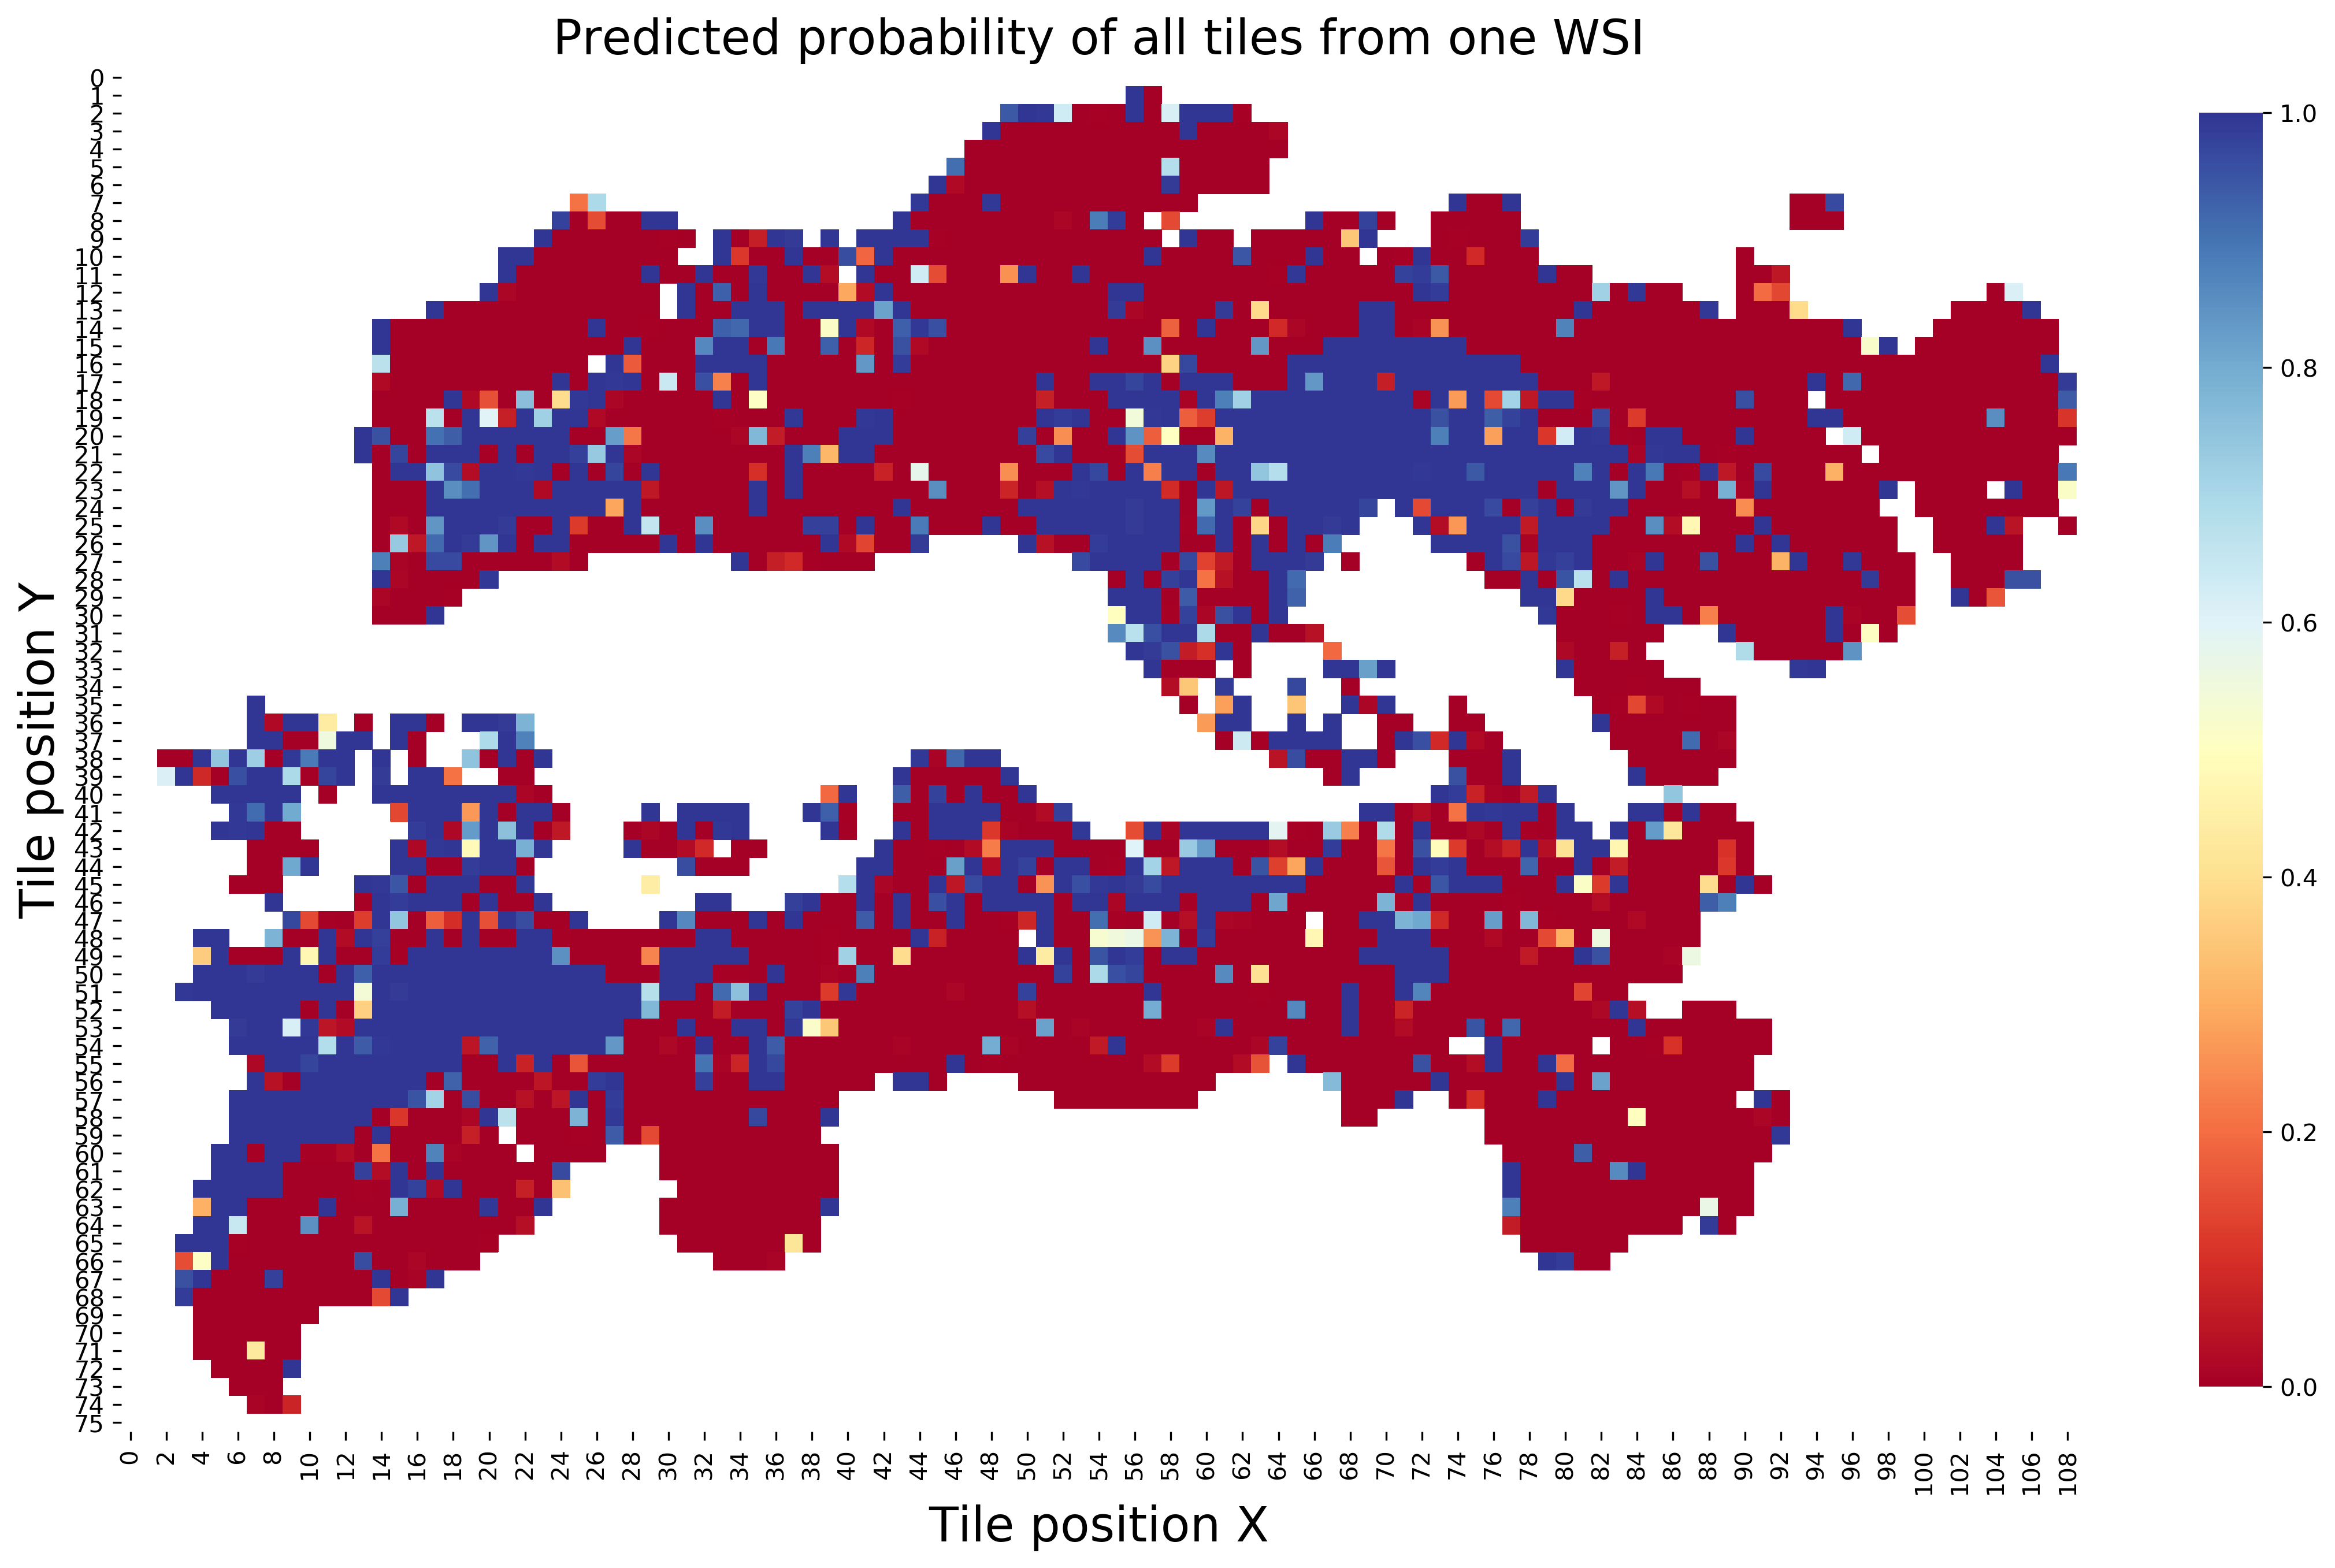

In [48]:
plt.figure(figsize = (15,15), dpi = 300)
cm_plot = sns.heatmap(df, vmin = 0, vmax = 1, annot = False, fmt = '.2f', cmap = 'RdYlBu', 
                      square = True, mask = mask, cbar_kws={"shrink": 0.5}) 
# 'RdYlBu'
plt.title('Predicted probability of all tiles from one WSI', fontsize = 20)
#Display axes labels
plt.ylabel('Tile position Y', fontsize = 20)
plt.xlabel('Tile position X', fontsize = 20)
#plt.savefig('{}_confusion_matrix.pdf'.format(prefix))
plt.tight_layout()